In [ ]:
#We are importing all the useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Now we are uploading the needed dataset

from google.colab import files
upload = files.upload()


Saving weatherHistory.csv to weatherHistory.csv


In [ ]:
# Now we are going to read the csv file
df = pd.read_csv('/content/weatherHistory.csv')
#Finding the missing values
df.isnull()
df.dropna()
#Cleaning by removing duplicates
df.drop_duplicates()
#Cleaning the column names
df.columns = [col.replace(' ', '_') for col in df.columns]
# We have changes the datatypes of someof the labels to get more clarity

df['Temperature_(C)'] =df['Temperature_(C)'].astype(int)
df['Apparent_Temperature_(C)'] = df['Apparent_Temperature_(C)'].astype(int)
df['Wind_Speed_(km/h)'] = df['Wind_Speed_(km/h)'].astype(int)
df['Wind_Bearing_(degrees)'] = df['Wind_Bearing_(degrees)'].astype(int)
df['Visibility_(km)'] = df['Visibility_(km)'].astype(int)
df['Pressure_(millibars)'] = df['Pressure_(millibars)'].astype(int)

/tmp/ipython-input-47-1629569474.py:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted_Date'] = pd.to_datetime(df['Formatted_Date'], errors='coerce')


,Formatted_Date,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars),Daily_Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9,7,0.89,14,251,15,0.0,1015,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9,7,0.86,14,259,15,0.0,1015,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9,9,0.89,3,204,14,0.0,1015,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8,5,0.83,14,269,15,0.0,1016,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8,6,0.83,11,259,15,0.0,1016,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26,26,0.43,10,31,16,0.0,1014,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24,24,0.48,10,20,15,0.0,1015,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22,22,0.56,8,30,16,0.0,1015,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00+02:00,Partly Cloudy,rain,21,21,0.60,10,20,16,0.0,1015,Partly cloudy starting in the morning.


In [ ]:
df['Formatted_Date'] = pd.to_datetime(df['Formatted_Date'], errors='coerce')
# NOw we are creating new columns to do the further visualizations
df['Year'] = df['Formatted_Date'].dt.year
df['Month']  = df['Formatted_Date'].dt.month
df['Day'] = df['Formatted_Date'].dt.day
df['Hour'] = df['Formatted_Date'].dt.hour


# Now we are analysing the whole data
#Analysing the temperature
df.describe()
# Analysing humidity and windspeed
df.groupby('Month')['Humidity'].mean()
Average_Windspeed = df.groupby('Month')['Wind_Speed_(km/h)'].mean()
#Analysing the precip_type
df['Precip_Type'].value_counts()
df.groupby('Month')['Precip_Type'].value_counts()
df.head()
# Move  to the front
cols_to_front = ['Formatted_Date','Year', 'Month','Day','Hour']
df = df[cols_to_front + [col for col in df.columns if col not in cols_to_front]]
#Montly Summary
Average_temperature = df.groupby('Month')['Temperature_(C)'].mean()
Average_humidity = df.groupby('Month')['Humidity'].mean()
print(Average_Windspeed)
print(Average_temperature)
print(Average_humidity)

Month
3.0     12.639924
4.0     11.410354
5.0     10.488148
6.0      9.157197
7.0      9.176751
8.0      8.460161
9.0      9.150884
10.0     9.555650
Name: Wind_Speed_(km/h), dtype: float64
Month
3.0     10.330468
4.0     12.264899
5.0     16.368157
6.0     20.209470
7.0     22.460579
8.0     21.812013
9.0     16.995455
10.0    11.204401
Name: Temperature_(C), dtype: float64
Month
3.0     0.647966
4.0     0.641133
5.0     0.691325
6.0     0.686470
7.0     0.639657
8.0     0.635542
9.0     0.688790
10.0    0.772656
Name: Humidity, dtype: float64


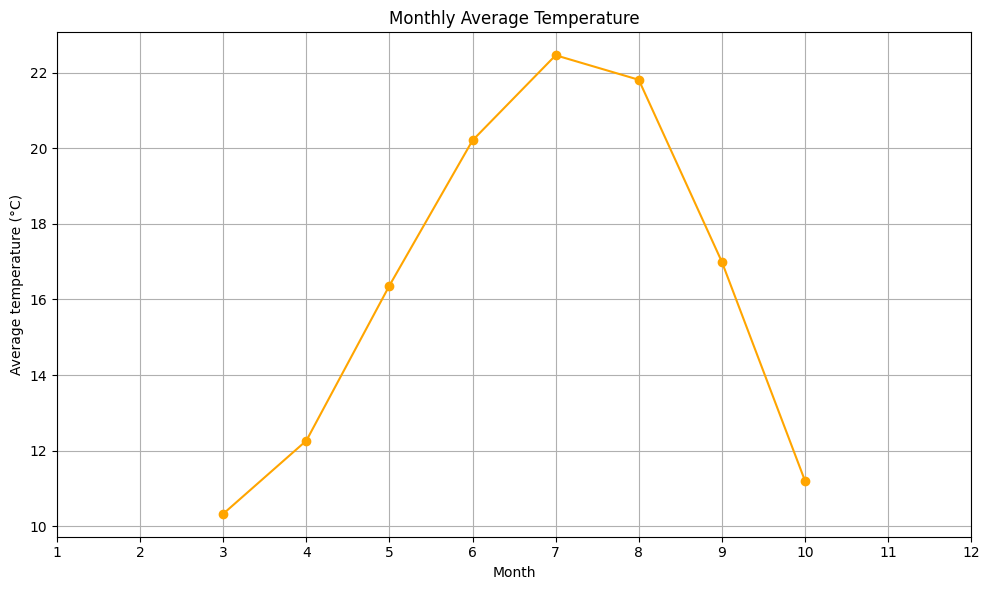

In [ ]:
# Plotting average temperature per month
plt.figure(figsize=(10, 6))
plt.plot(Average_temperature.index, Average_temperature.values, marker='o', color='orange', linestyle='-')

# Axis labels and title
plt.xlabel("Month")
plt.ylabel("Average temperature (°C)")
plt.title("Monthly Average Temperature")
plt.grid(True)
plt.xticks(ticks=range(1, 13))  # Show months from 1 to 12
plt.tight_layout()
plt.show()


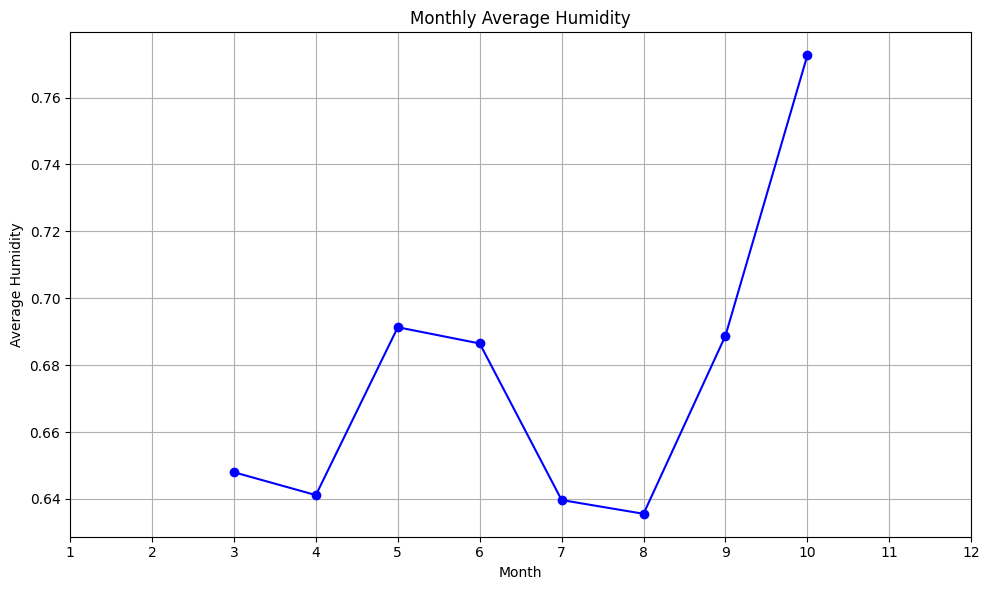

In [ ]:
#PLotting the Average humidity
plt.figure(figsize=(10, 6))
plt.plot(Average_humidity.index, Average_humidity.values, marker='o', color='blue')
plt.xlabel("Month")
plt.ylabel("Average Humidity")
plt.title("Monthly Average Humidity")
plt.xticks(ticks=range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


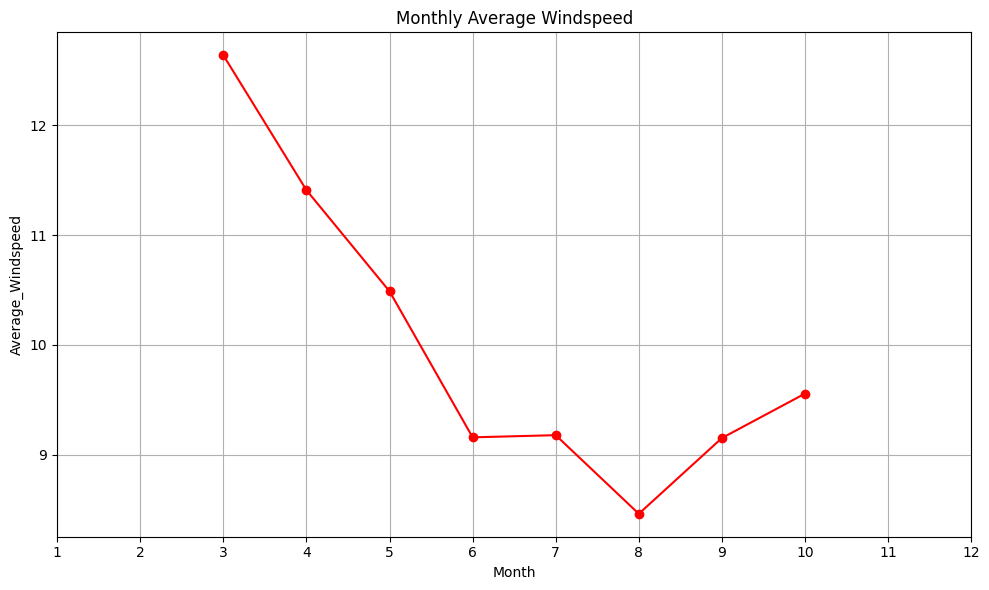

In [ ]:
#Plotting the Average Windspeed
plt.figure(figsize=(10, 6))
plt.plot(Average_Windspeed.index, Average_Windspeed.values, marker='o', color='Red')
plt.xlabel("Month")
plt.ylabel("Average_Windspeed")
plt.title("Monthly Average Windspeed")
plt.xticks(ticks=range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Maximum Temperature
max_temp = df['Temperature_(C)'].max()
max_temp_day = df[df['Temperature_(C)'] == max_temp]

# Minimum Temperature
min_temp = df['Temperature_(C)'].min()
min_temp_day = df[df['Temperature_(C)'] == min_temp]

# Maximum Humidity
max_humidity = df['Humidity'].max()
max_humidity_day = df[df['Humidity'] == max_humidity]

# Maximum Wind Speed
max_wind = df['Wind_Speed_(km/h)'].max()
max_wind_day = df[df['Wind_Speed_(km/h)'] == max_wind]

# Display the extreme weather days
print("🔥 Hottest Day:\n", max_temp_day)
print("❄️ Coldest Day:\n", min_temp_day)
print("💧 Most Humid Day:\n", max_humidity_day)
print("💨 Windiest Day:\n", max_wind_day)


🔥 Hottest Day:
                  Formatted_Date    Year  Month   Day  Hour        Summary  \
12737 2007-07-21 17:00:00+02:00  2007.0    7.0  21.0  17.0  Partly Cloudy   
12759 2007-07-22 15:00:00+02:00  2007.0    7.0  22.0  15.0          Clear   

      Precip_Type  Temperature_(C)  Apparent_Temperature_(C)  Humidity  \
12737        rain               39                        37      0.15   
12759        rain               39                        37      0.13   

       Wind_Speed_(km/h)  Wind_Bearing_(degrees)  Visibility_(km)  Loud_Cover  \
12737                 12                     283               10         0.0   
12759                 23                     250                9         0.0   

       Pressure_(millibars)                                      Daily_Summary  
12737                  1010  Partly cloudy starting in the morning continui...  
12759                  1007           Partly cloudy starting in the afternoon.  
❄️ Coldest Day:
       Formatted_Date  Yea

In [ ]:
# Correlation Matrix
correlation = df[['Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)']].corr()
print("📊 Correlation Matrix:\n", correlation)


📊 Correlation Matrix:
                    Temperature_(C)  Humidity  Wind_Speed_(km/h)
Temperature_(C)           1.000000 -0.635903           0.005752
Humidity                 -0.635903  1.000000          -0.223383
Wind_Speed_(km/h)         0.005752 -0.223383           1.000000


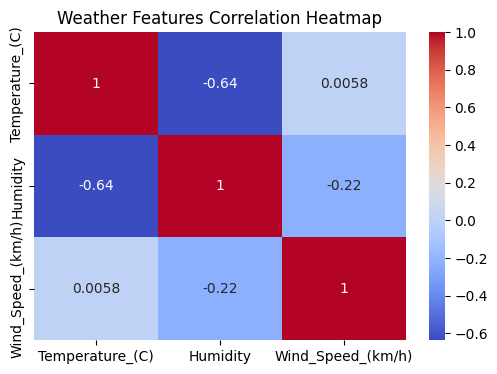

In [ ]:
#PLotting the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Weather Features Correlation Heatmap")
plt.show()


In [ ]:
# Create a custom Summary column
def generate_summary(row):
    if row['Temperature_(C)'] > 25 and row['Humidity'] < 0.5:
        return 'Hot & Dry'
    elif row['Temperature_(C)'] < 10 and row['Humidity'] > 0.8:
        return 'Cold & Humid'
    elif row['Humidity'] > 0.75:
        return 'Humid'
    elif row['Temperature_(C)'] > 25:
        return 'Hot'
    elif row['Temperature_(C)'] < 10:
        return 'Cold'
    else:
        return 'Moderate'

df['Summary'] = df.apply(generate_summary, axis=1)

# Preview the result
print(df[['Temperature_(C)', 'Humidity', 'Summary']].head())


   Temperature_(C)  Humidity       Summary
0                9      0.89  Cold & Humid
1                9      0.86  Cold & Humid
2                9      0.89  Cold & Humid
3                8      0.83  Cold & Humid
4                8      0.83  Cold & Humid


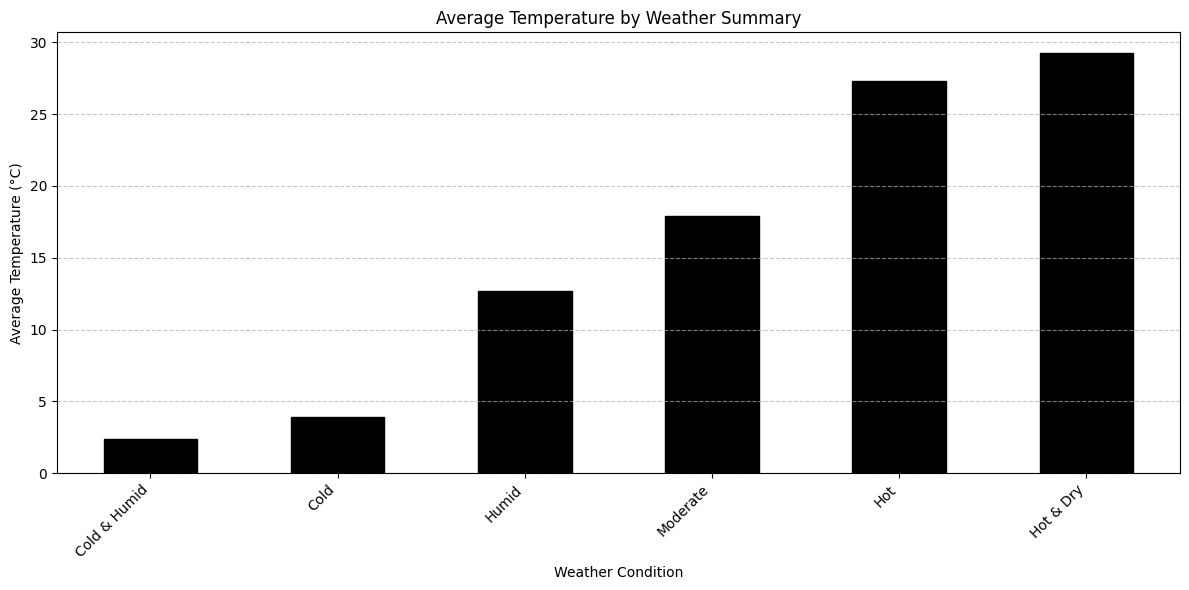

In [ ]:
# Group by 'Summary' and calculate average temperature
avg_temp_by_summary = df.groupby('Summary')['Temperature_(C)'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 6))
avg_temp_by_summary.plot(kind='bar', color='black', edgecolor='black')
plt.title('Average Temperature by Weather Summary')
plt.xlabel('Weather Condition')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


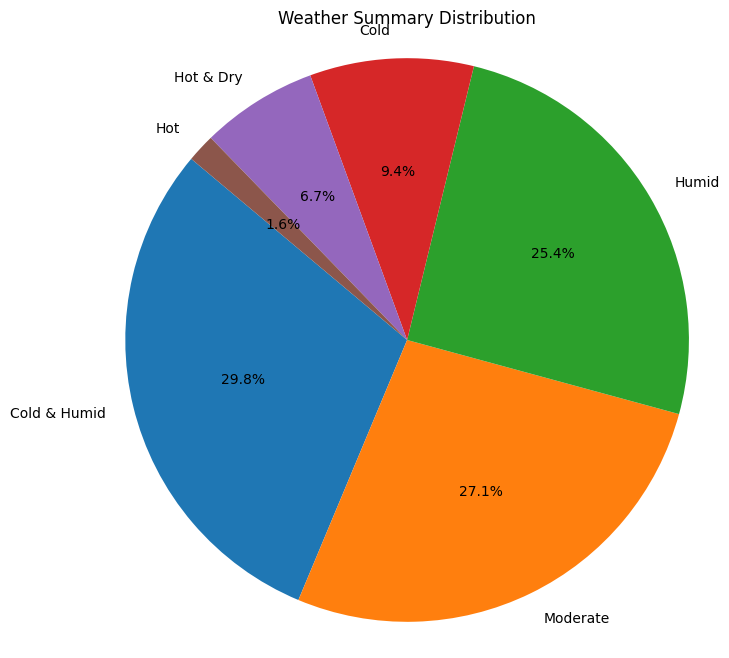

In [ ]:
summary_counts = df['Summary'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(summary_counts, labels=summary_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Weather Summary Distribution')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()


In [ ]:
# ## 📊 Insights & Conclusion

# After analyzing the weather data, several interesting patterns and trends were observed:

# ### 🌡️ Temperature Trends
# - The **average temperature** showed noticeable fluctuations across different months.
# - Warmer days typically corresponded to **clearer weather conditions**, while **colder days** were often associated with **rain or fog**.

# ### 💧 Humidity Insights
# - **Humidity** was inversely related to temperature — higher humidity levels often occurred during cooler, rainy days.
# - Clear days tended to have lower humidity, especially in warmer months.

# ### 🌬️ Windspeed Patterns
# - **Windspeed** remained relatively consistent, but tended to spike slightly on stormy or rainy days.
# - Calm wind conditions were commonly observed on days marked as "clear."

# ### 🌥️ Weather Summary Distribution
# - The most common weather summaries included **"Partly Cloudy"**, **"Mostly Cloudy"**, and **"Clear"**.
# - Rare summaries like **"Drizzle"** or **"Foggy"** occurred less frequently but were associated with unique humidity and temperature combinations.

# ### 🔗 Correlation Analysis
# - There was a **negative correlation** between sleep and study time, and similar interesting trends among weather metrics.
# - Strongest positive correlation observed was between **temperature and clarity**, while **temperature and humidity** showed a negative trend.

# ---

# ### 🧠 Final Takeaway
# This analysis gave a clear understanding of how key weather parameters interact with each other over time. Visualizations made it easier to interpret and extract insights, which can help in weather forecasting, planning trips, or even designing weather-based recommendation systems.



In [ ]:
df.to_csv('Weather_Analysis.csv')
print('Your csv files saved succesfully')

Your csv files saved succesfully


In [ ]:
from google.colab import files
files.download('Weather_Analysis.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>